In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
years = list(range(2000, 2023))

In [21]:
#actuals
actual_corn = [8.591008323,8.673266259,8.118009766,8.924730059,10.06362843,9.285272542,9.357832505,9.458416633,9.621052963,10.31803911,9.575788835,9.214582413,7.726892182,9.925863141,10.73276272,10.57239902,10.9604626,11.08377886,11.0748229,10.51045084,10.76061962,11.08966895,10.78809182]
actual_sb = [2.561341842,2.663957741,2.556752335,2.276951926,2.840494487,2.896129569,2.881782047,2.806695173,2.671861558,2.959523732,2.924329904,2.823251608,2.686798209,2.961523501,3.197780503,3.230622733,3.493606215,3.313417596,3.399768675,3.187489696,3.432721072,3.479286553,3.348137372]
actual_wheat = [2.823926609,2.701926998,2.356827006,2.971267579,2.902680249,2.823189978,2.598711653,2.704636853,3.014640385,2.980515617,3.102724925,2.933852561,3.106527468,3.167348051,2.937882904,2.930544676,3.540828402,3.117515463,3.20062383,3.474591951,3.341684578,2.980574774,3.127315782]

In [22]:
#CORN
avg_ndvi_corn = [8.233605, 9.283057, 8.173892,8.740734,9.938123,9.083134,8.946198,9.784091,9.536734,10.243003,9.707249,10.1787,8.366316,9.097251,10.996331,9.983397,11.373075,10.465948,10.022666,10.968335,11.157883,11.134649,10.135365]
bin_5_corn = [8.185971,9.861613,9.117059,8.443906,9.877512,8.912725,8.61413,8.224655,9.900023,10.439571,9.8272295,9.8871,8.376422,8.7960615,10.939813,9.880487,10.6449995,10.7717905,10.410653,9.9549,10.779166,11.02636,10.100969]
bin_10_corn = [8.090005,9.752931,9.3590765,8.174032,9.747702,9.16514,8.272751,8.163734,9.562782,10.211837,9.876449,10.180847,8.92754,9.930616,10.952408,9.95461,10.387626,10.656973,10.43988,9.975242,10.951482,10.8927555,10.135869]
bin_20_corn = [8.171733,10.060022,9.4949,8.5285015,9.765156,8.776447,8.58381,8.314028,9.381184,10.693093,9.573654,10.490107,8.921724,8.915499,11.073842,10.223963,10.775831,10.653309,10.321106,10.171714,10.70009,11.021469,9.506986]

In [23]:
#SB
avg_ndvi_sb = [2.4826252,2.7583666,2.4874632,2.547614,2.8822489,2.9333017,2.740933,2.6142802,2.5672426,3.069907,2.7931163,2.8983164,2.6529508,3.0661383,3.2862782,3.2936146,3.4400196,3.3452322,3.3683925,3.1455035,3.4230282,3.4994912,3.1743808]
bin_5_sb = [2.576112,2.4530382,2.6180696,2.660296,2.8120313,2.9209063,2.494398,2.61359,2.639565,3.0364304,2.8191807,3.0312006,2.458316,3.1835299,3.3317888,3.1199243,3.3533683,3.4602354,2.8856366,2.8002443,3.24751,3.4310238,2.9513412]
bin_10_sb = [2.5188215,2.6685386,2.7883267,2.6025634,2.6725564,2.8357406,2.480841,2.7117922,2.559291,3.1211395,2.7753139,2.9263036,2.3059535,3.10811,3.335957,2.7772648,3.2842078,3.397762,3.0118017,3.0854177,3.3394725,3.3620517,3.0621872]
bin_20_sb = [2.5227714,2.6996741,2.8653414,2.707816,2.7811825,3.0474496,2.4521327,2.7385151,2.5023997,3.231171,2.5381706,2.9605768,2.2843087,2.948666,3.339041,2.7775762,3.2249668,3.4262204,3.0897148,2.9615211,3.3105671,3.442786,3.1011038]

In [24]:
#WHEAT
avg_ndvi_wheat = [2.3581111,2.7577465,3.0076962,2.539329,3.1055737,2.4418478,2.579081,3.0082073,2.6332252,3.4249659,3.0680184,2.825129,2.3350103,3.2840414,3.1589575,3.0486472,3.117512,3.495091,2.563196,3.3394275,3.0824704,3.1788871,3.2880015]
bin_5_wheat = [3.037713,2.6032543,2.9651098,2.615729,3.2192652,3.4334903,2.7105734,3.252718,2.440716,3.2827563,2.8023689,3.0539064,2.6511908,3.0694327,3.084173,3.2400894,2.8765411,3.4902704,2.8933954,3.344268,3.1807775,3.052347,3.0214012]
bin_10_wheat = [3.1121767,2.7461522,2.9886782,2.6507528,3.0488873,3.1743762,2.5083082,2.7772791,2.492884,3.262912,2.9839087,2.9064395,2.5863204,2.9670498,3.159225,3.088597,3.1605518,3.432571,2.8845706,3.345762,3.245,3.0172951,3.0538816]
bin_20_wheat = [3.163539,2.8294754,2.82323,2.5834975,3.062538,3.4020643,2.4705462,2.9916663,2.5350866,3.1798236,2.727389,2.9452941,2.6218412,2.8641005,3.1916082,2.9674537,3.155173,3.4856236,2.942987,3.2669067,3.4038255,3.0459445,2.7750485]

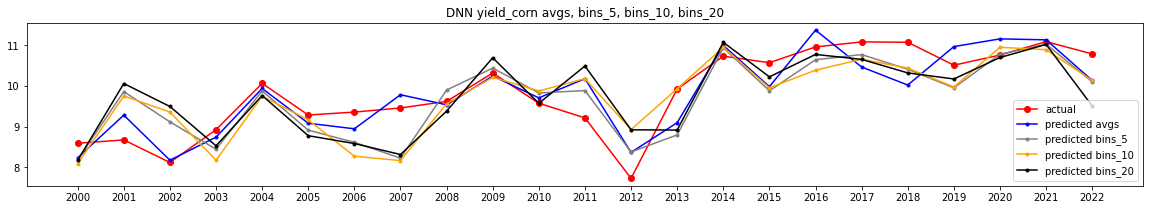

In [28]:
plt.rcParams['figure.figsize'] = (20,3)

plt.plot(years, actual_corn, color='red', marker='o', label='actual')
plt.plot(years, avg_ndvi_corn, color='blue', marker='.', linestyle='-', label='predicted avgs')
plt.plot(years, bin_5_corn, color='gray', marker='.', linestyle='-', label='predicted bins_5')
plt.plot(years, bin_10_corn, color='orange', marker='.', linestyle='-', label='predicted bins_10')
plt.plot(years, bin_20_corn, color='black', marker='.', linestyle='-', label='predicted bins_20')

plt.title('DNN yield_corn avgs, bins_5, bins_10, bins_20')
plt.legend(loc='lower right')
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.show()

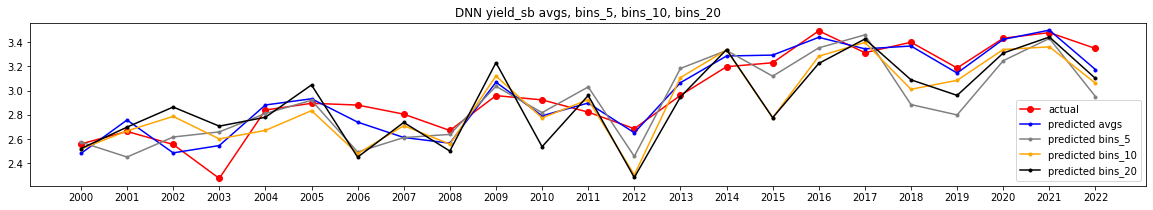

In [29]:
plt.rcParams['figure.figsize'] = (20,3)

plt.plot(years, actual_sb, color='red', marker='o', label='actual')
plt.plot(years, avg_ndvi_sb, color='blue', marker='.', linestyle='-', label='predicted avgs')
plt.plot(years, bin_5_sb, color='gray', marker='.', linestyle='-', label='predicted bins_5')
plt.plot(years, bin_10_sb, color='orange', marker='.', linestyle='-', label='predicted bins_10')
plt.plot(years, bin_20_sb, color='black', marker='.', linestyle='-', label='predicted bins_20')

plt.title('DNN yield_sb avgs, bins_5, bins_10, bins_20')
plt.legend(loc='lower right')
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.show()

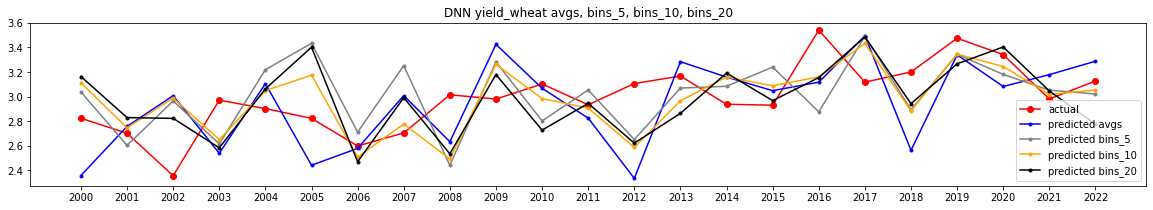

In [30]:
plt.rcParams['figure.figsize'] = (20,3)

plt.plot(years, actual_wheat, color='red', marker='o', label='actual')
plt.plot(years, avg_ndvi_wheat, color='blue', marker='.', linestyle='-', label='predicted avgs')
plt.plot(years, bin_5_wheat, color='gray', marker='.', linestyle='-', label='predicted bins_5')
plt.plot(years, bin_10_wheat, color='orange', marker='.', linestyle='-', label='predicted bins_10')
plt.plot(years, bin_20_wheat, color='black', marker='.', linestyle='-', label='predicted bins_20')

plt.title('DNN yield_wheat avgs, bins_5, bins_10, bins_20')
plt.legend(loc='lower right')
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.show()